# Car Price Analysis


## Introduction


The aim of this analysis is to explore factors influencing car prices through a correlation matrix and subsequent hypothesis testing. This will provide insights into how different car attributes relate to their prices, aiding in understanding pricing strategies within the automotive industry.


<h2 id="import_data">1. Data Preparation </h2>


Before diving into the analysis, we first need to import the necessary libraries and load the dataset.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
%matplotlib inline 

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)

Once the dataset is loaded, it is crucial to inspect its structure. We can achieve this using the head() method, which displays the first few rows of the dataset. This allows us to verify that the data has loaded correctly and gives us a glimpse of the variables we will be analyzing.

In [6]:
# Display the first few rows of the dataset
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


We need to check for missing values, duplicates, and outliers

In [8]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64
Duplicates: 0


In [10]:
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['horsepower-binned'] = df['horsepower-binned'].fillna(df['horsepower-binned'].mode()[0])

<h2 id="pattern_visualization">2. Descriptive Statistical Analysis</h2>


Let's first take a look at the variables by utilizing a descriptive method. The describe function automatically computes basic statistics for all continuous variables.

In [12]:
display(round(df.describe(), 2).T)

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.84,1.25,-2.00,0.00,1.00,2.00,3.00
normalized-losses,201.0,122.00,32.00,65.00,101.00,122.00,137.00,256.00
wheel-base,201.0,98.80,6.07,86.60,94.50,97.00,102.40,120.90
length,201.0,0.84,0.06,0.68,0.80,0.83,0.88,1.00
width,201.0,0.92,0.03,0.84,0.89,0.91,0.92,1.00
height,201.0,53.77,2.45,47.80,52.00,54.10,55.50,59.80
curb-weight,201.0,2555.67,517.30,1488.00,2169.00,2414.00,2926.00,4066.00
engine-size,201.0,126.88,41.55,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,201.0,3.26,0.32,2.07,3.11,3.29,3.41,4.17


The default setting of “describe” skips variables of type object. We can apply the method “describe” on the variables of type ‘object’ as follows:

In [14]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,116


<b> Summary Insights </b>

<p>The dataset includes 201 cars with various numerical and categorical features, offering valuable insights into factors affecting car prices.</p>

<p> Numerical Features:  </p>
<ul>
<li> The average car price is approximately 13,207, with a standard deviation of 7,947, indicating a wide range of prices from 5,118 to $45,400. </li>
<li> The mean curb weight is 2,555.67 lbs, reflecting substantial differences in vehicle size and construction, with weights ranging from 1,488 lbs to 4,066 lbs. </li>
<li> The average engine size is 126.88 cu in, with a maximum of 326 cu in, highlighting the presence of both small and large engines. </li>
<li> Average horsepower is 103.41, with the highest recorded at 262, suggesting variations in performance among different models. </li>
<li> The average city MPG is 25.18, while the average highway MPG is 30.69, reflecting a moderate level of fuel efficiency across the dataset. </li>
</ul>

<p> Categorical Features: </p>
<ul>
<li>  The dataset features 22 unique car makes, with Toyota being the most common (32 occurrences). </li>
<li>  Cars are categorized into five body styles, with sedans being the most frequent (94 occurrences). </li>
<li> The dataset includes three drive-wheel configurations, with front-wheel drive (FWD) being the most prevalent (118 occurrences). </li>
<li>  There are six different engine types, with overhead cam (OHC) engines being the most common (145 occurrences). </li>
<li> The fuel system varies, with multi-port fuel injection (MPFI) being the most frequent type (115 occurrences). </li>
</ul>


<b> Distribution of Car Prices </b>

Understanding the distribution of car prices helps identify outliers and the general price range.

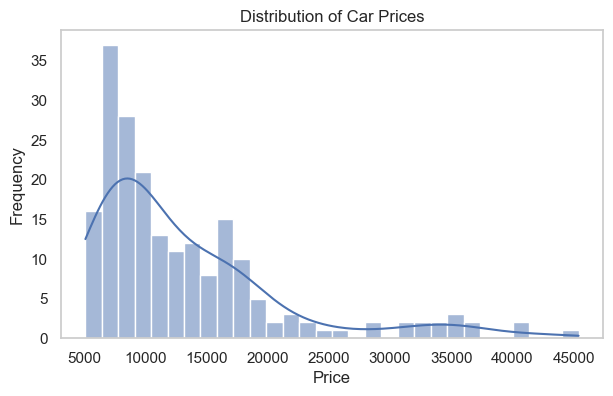

In [36]:
# Plotting the distribution of car prices
plt.figure(figsize=(7, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<b>  Pairplot for Relationships </b>

A pairplot can help visualize the relationships among multiple numerical variables, revealing patterns and correlations.

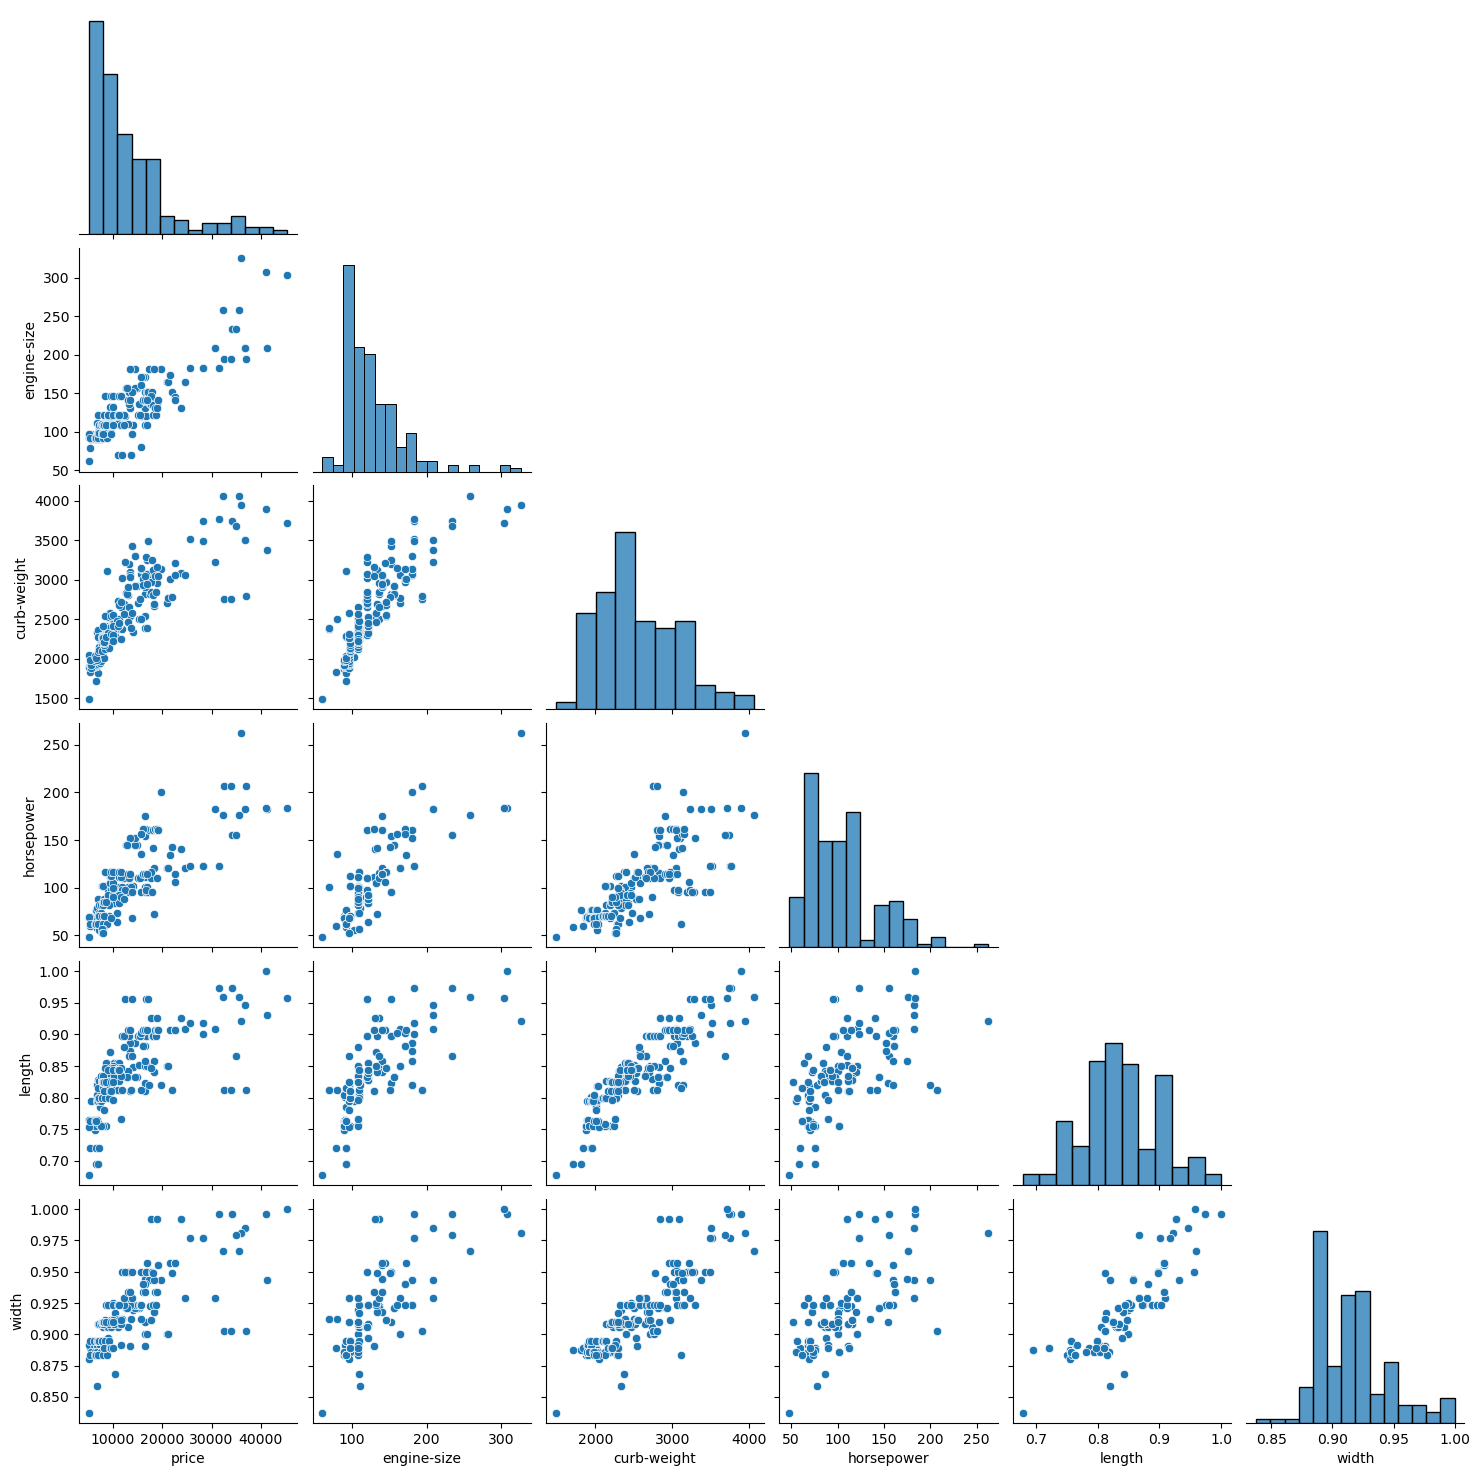

In [18]:
# Pairplot of selected features
selected_features = ['price', 'engine-size', 'curb-weight', 'horsepower', 'length', 'width']
sns.pairplot(df[selected_features],corner = True)
#plt.title('Pairplot of Selected Features')
plt.show()

<b> Box Plots for Categorical Features </b>

Box plots can illustrate how prices vary with different categorical variables (e.g., fuel type, body style).

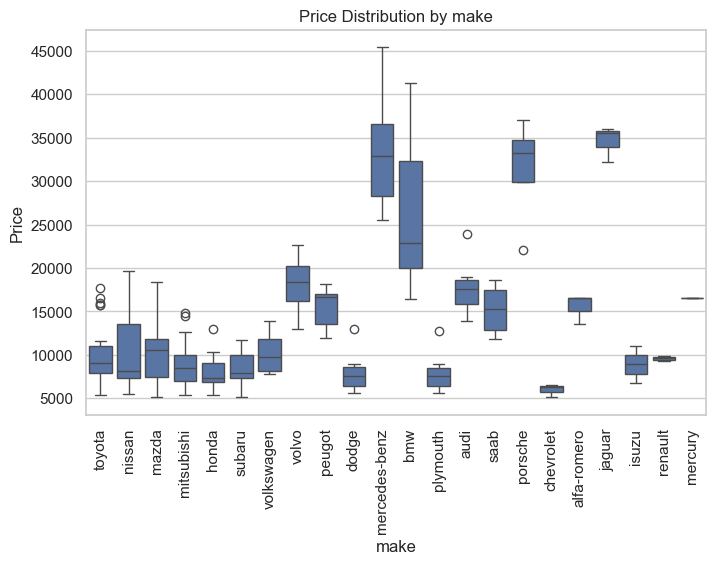

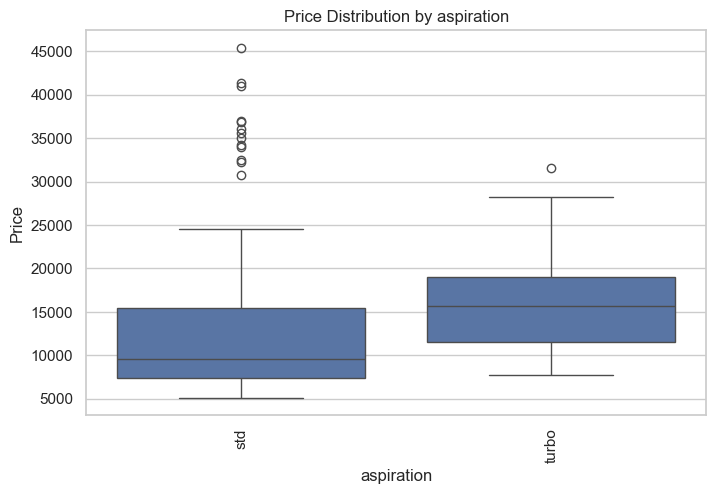

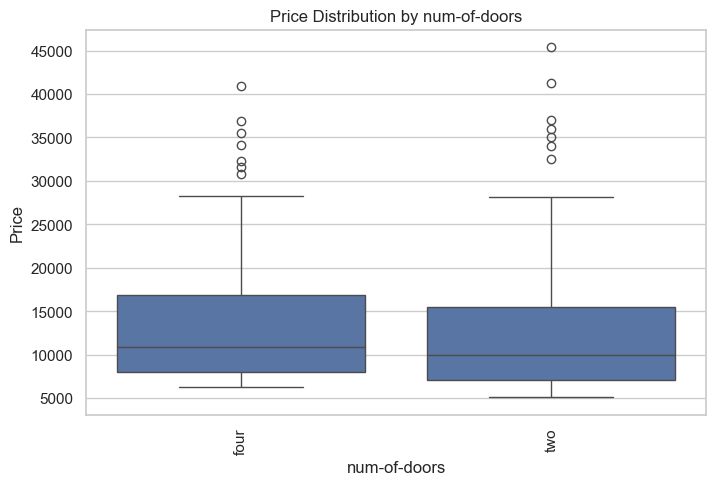

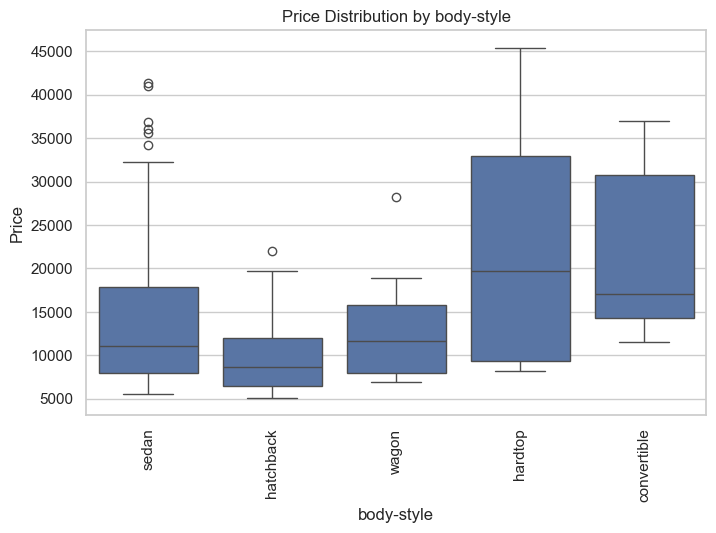

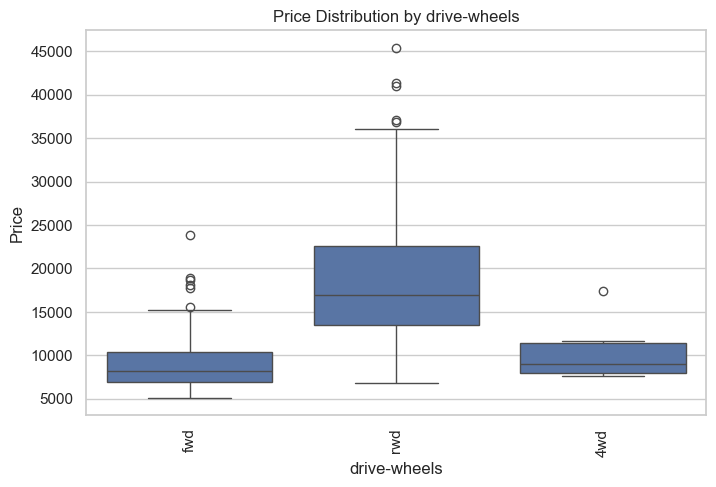

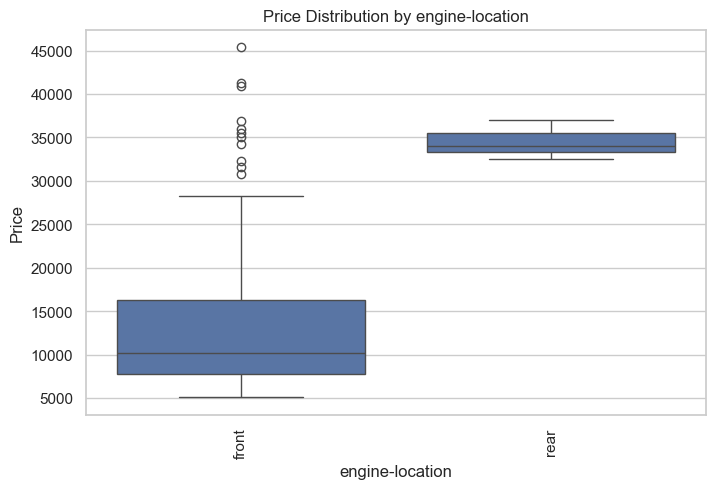

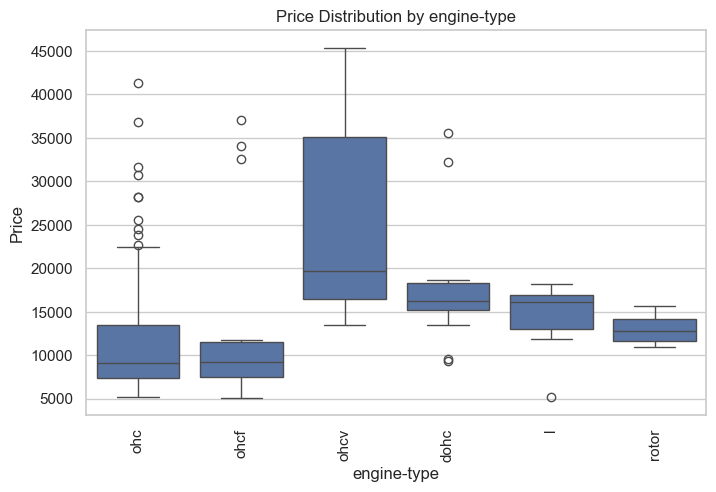

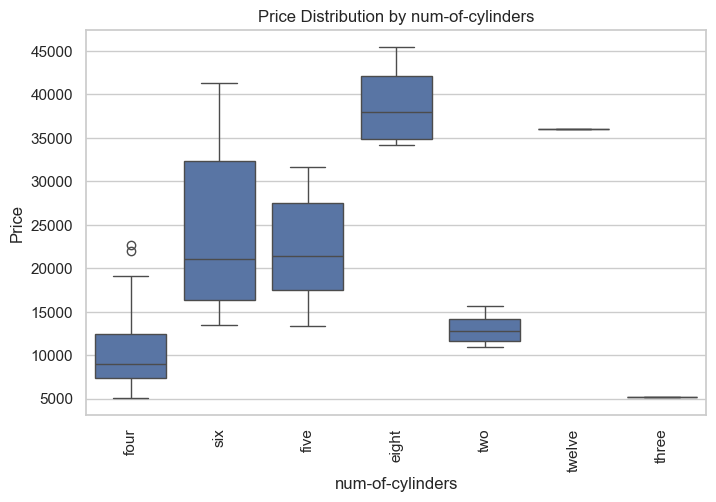

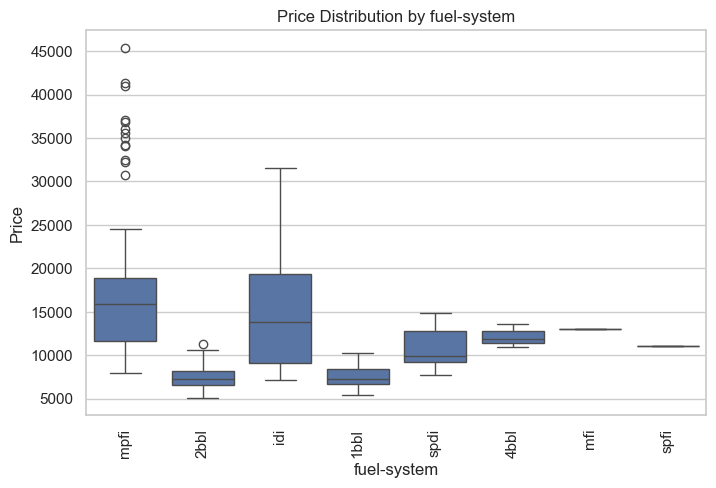

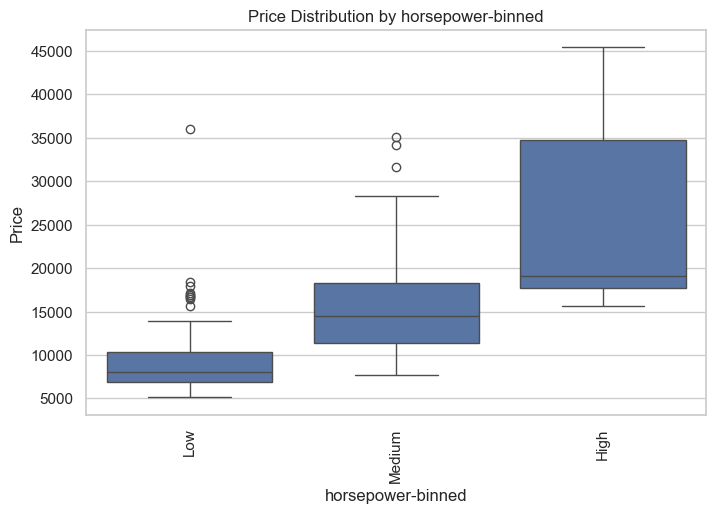

In [32]:
# Function to create box plots comparing price against categorical variables
def plot_price_by_category(variable, df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=variable, y='price', order=df[variable].value_counts().index)
    plt.title(f'Price Distribution by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()

# Generate box plots for selected categorical variables
boxplot_vars = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 
    'num-of-cylinders', 'fuel-system', 'horsepower-binned']

for var in boxplot_vars:
    plot_price_by_category(var, df)

<h2 id="basic_grouping">3. Average Prices</h2>


<b> a) Average Prices by Body Style </b>

We will use the Funnel chart style to represent average prices by body style:

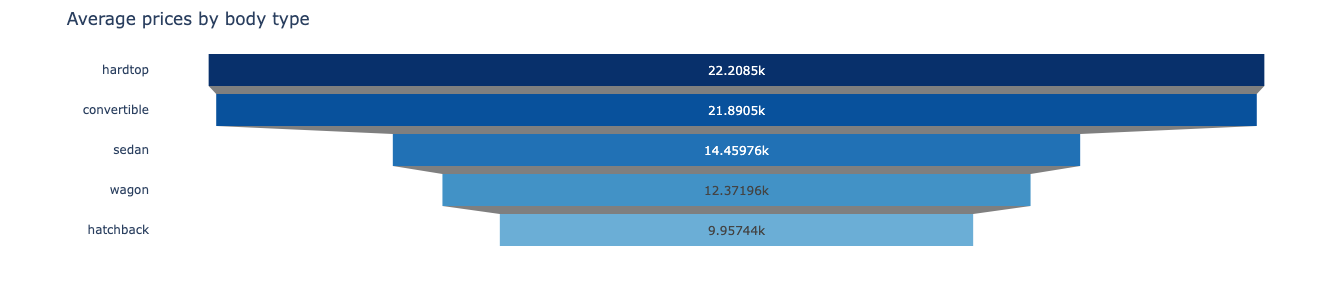

In [132]:
df_gptest2 = df[['body-style', 'price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle = grouped_test_bodystyle.sort_values(by='price', ascending=False)

fig = go.Figure(go.Funnel( y=grouped_test_bodystyle['body-style'], x=grouped_test_bodystyle['price'],
    textinfo='value', marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text="Average prices by body type", template='plotly_white', width=500, height=300, margin=dict(l=150, r=10, t=50, b=50))
fig.show() 

<b> b) Average Price by Drive Wheels </b>

Now, we will create a Funnel chart for average price by drive wheels:

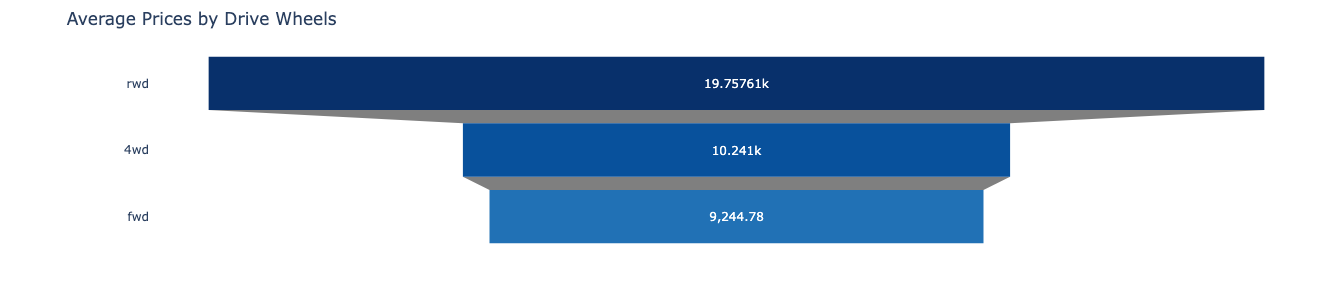

In [157]:
df_gptest3 = df[['drive-wheels', 'price']]
grouped_test_drivewheels = df_gptest3.groupby(['drive-wheels'], as_index=False).mean()
grouped_test_drivewheels = grouped_test_drivewheels.sort_values(by='price', ascending=False)

fig_drivewheels = go.Figure(go.Funnel(y=grouped_test_drivewheels['drive-wheels'], x=grouped_test_drivewheels['price'],
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig_drivewheels.update_layout(title_text="Average Prices by Drive Wheels", template='plotly_white', width=500, height=300, margin=dict(l=150, r=10, t=50, b=50))
fig_drivewheels.show()


<b> c) Average Price by body-style and Drive Wheels </b>

Finally, for the heatmap showing the average price by drive wheels and body style, we'll implement the style you've indicated:

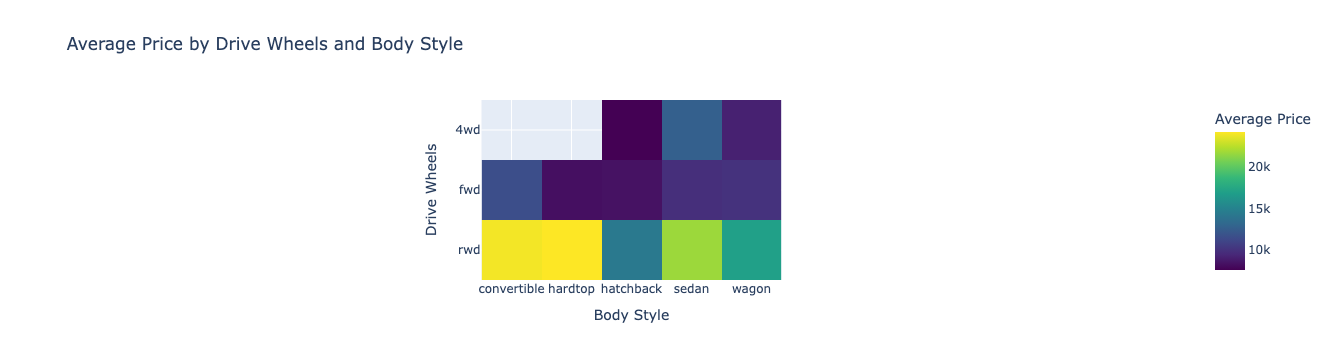

In [160]:
grouped_test1 = df.groupby(['drive-wheels', 'body-style'], as_index=False)['price'].mean()

grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style', values='price')
grouped_pivot.reset_index(inplace=True)

fig_heatmap = px.imshow(grouped_pivot.set_index('drive-wheels'), labels=dict(x="Body Style", y="Drive Wheels", color="Average Price"),
    color_continuous_scale='Viridis', title="Average Price by Drive Wheels and Body Style")
fig_heatmap.show()

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">4. Correlation and Causation</h2>


Using Pearson Correlation, we can measure the degree of association between the variables in our dataset. To visualize these relationships, we can create a heatmap of the correlation matrix, helping to identify which features are most closely related to price.

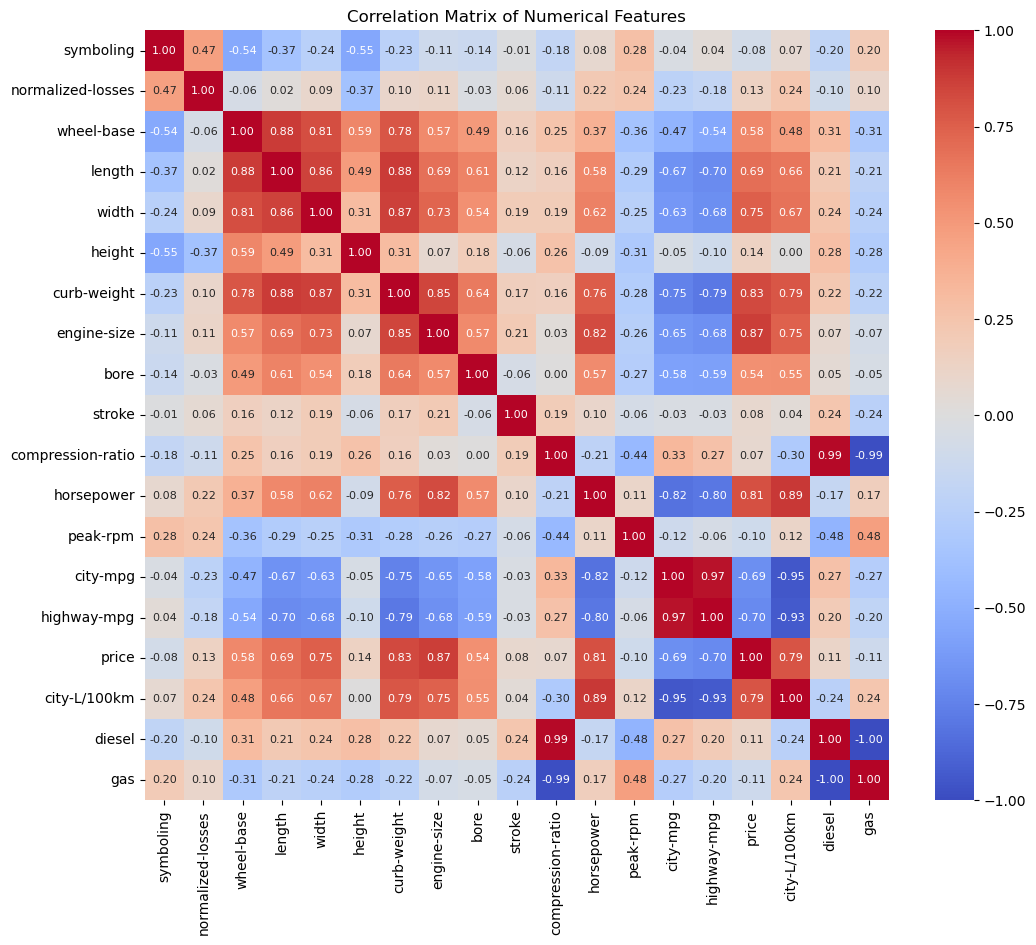

In [181]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features')                   
plt.show()                  

To reinforce the findings from the correlation matrix, hypothesis testing is conducted on significant variables.

<b> Hypothesis Testing </b>

To reinforce the findings from the correlation matrix, hypothesis testing is conducted on significant variables. Let's calculate the  Pearson Correlation Coefficient and P-value. 


In [212]:
variables = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg']
results = []

for var in variables:
    pearson_coef, p_value = stats.pearsonr(df[var], df['price'])
    results.append({'Variable': var, 'Pearson Coefficient': pearson_coef, 'P-value': p_value})

results_df = pd.DataFrame(results)
print(results_df)

      Variable  Pearson Coefficient       P-value
0   wheel-base             0.584642  8.076488e-20
1   horsepower             0.809575  6.369057e-48
2       length             0.690628  8.016477e-30
3        width             0.751265  9.200336e-38
4  curb-weight             0.834415  2.189577e-53
5  engine-size             0.872335  9.265492e-64
6         bore             0.543155  8.049189e-17
7     city-mpg            -0.686571  2.321132e-29
8  highway-mpg            -0.704692  1.749547e-31



<h4> key insights from Analysis : </h4>

Based on the correlation matrix and p-values, here are brief insights into significant relationships between variables and their impact on car price:

<ul>    
<li> Engine Size, Weight, and Horsepower Drive Higher Prices:
The most influential factors on car price are engine size, curb weight, and horsepower. Vehicles with larger engines and greater horsepower are typically more expensive, as these features are often associated with higher performance and luxury. </li>
<li> Car Dimensions Correlate Positively with Price:
Both car width and length have strong positive correlations with price, suggesting that larger, more spacious cars generally come with a higher cost. </li>
<li> Fuel Efficiency and Lower Price Relationship:
Fuel-efficient cars, as indicated by higher city and highway MPG values, tend to have lower prices. This aligns with the trend of economical cars being priced more affordably. </li>
<li> Diesel vs. Gas Fuel Types Show Opposing Trends:
Diesel and gas fuel types show opposite correlations with car price, with diesel cars often exhibiting different price-influencing factors. This variance may be due to the differences in fuel type-related attributes. </li>
<li> Symboling and Height Have Minimal Influence on Price:
The insurance risk rating (symboling) and car height do not significantly impact the car’s price, indicating that these factors are less relevant in determining value. </li>
</ul>

<h3> Conclusion</h3>


This analysis demonstrates that key variables such as engine size, curb weight, and horsepower are strongly correlated with car prices, while fuel efficiency measures exhibit an inverse relationship. Understanding these correlations can help stakeholders in the automotive industry make informed decisions regarding pricing, design, and marketing strategies. The findings suggest a trade-off between performance/luxury and fuel economy, which is crucial for both manufacturers and consumers in today's market.